### Analyzing the Stroop Effect
Perform the analysis in the space below. Remember to follow [the instructions](https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True) and review the [project rubric](https://review.udacity.com/#!/rubrics/71/view) before submitting. Once you've completed the analysis and write-up, download this file as a PDF or HTML file, upload that PDF/HTML into the workspace here (click on the orange Jupyter icon in the upper left then Upload), then use the Submit Project button at the bottom of this page. This will create a zip file containing both this .ipynb doc and the PDF/HTML doc that will be submitted for your project.


(1) What is the independent variable? What is the dependent variable?

Independent Variable: The independent variable is whether the word is congruent or incongruent.

Dependent Variable: The dependent variable is the reaction time to name the correct colour.

(2) What is an appropriate set of hypotheses for this task? Specify your null and alternative hypotheses, and clearly define any notation used. Justify your choices.

#### Hypotheses:

$H_0$: $\mu_{C} = \mu_{I}$

$H_a$: $\mu_{C} \neq \mu_{I}$

Where:

$H_0$ represents the null hypothesis

$H_a$ represents the alternative hypothesis respectively

$\mu_C$ represents the population average reading time for congruently coloured words

$\mu_I$ represents the population average reading time for incongruently coloured words

Typically the null hypothesis states that nothing changes, therefore a valid null hypothesis would be that there is no variation between the times for both tasks. On the other hand, the alternative hypothesis would be that it takes more time to do the incongruent task. Just by looking at the sample means we can comfortabily conclude that the incongruent task takes more time to complete but this might have happend by chance. Both the sample size and the skill level of participants may effect the final result, therefore we want to see if there is a statistically significance between the dependent variable for both tasks.

$H_0$ : Assumes there is no statistically significant difference between the population mean time for congruent and incongurent words.

$H_a$: Assumes there is statistically significant difference between the population mean time for congruent and incongurent words.


#### Statistical Test: Dependent Sample two-tailed t-test 

The Dependent Sampling is the best option for this investigation since both congruent and incongruent words were presented to the same audience. A two-tailed test is favoured over a one-tailed test because we want to determine if there is any difference between the congruent and incongruent datasets. 

We opted for a t-test because the population paramteres are unknown and sample size is lower than 30. The significance value is $\alpha=0.05$. The test will definitively indicate with a single metric whether or not there is enough statistical evidence in the sample data to accept/reject the null hypothesis.

(3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from math import *

In [2]:
#Loading data
data = pd.read_csv("stroopdata.csv")

# Parse csv into pandas data structures
congruentSeries = data['Congruent']
incongruentSeries = data['Incongruent']

In [3]:
# Create a column for the difference between congruent and incongruent
data['diff'] = data['Incongruent']-data['Congruent']

In [4]:
# Descriptive statistics of the two conditions and the difference series
descriptive_stats = data.describe()
descriptive_stats

,Congruent,Incongruent,diff
count,24.000000,24.000000,24.000000
mean,14.051125,22.015917,7.964792
std,3.559358,4.797057,4.864827
min,8.630000,15.687000,1.950000
25%,11.895250,18.716750,3.645500
50%,14.356500,21.017500,7.666500
75%,16.200750,24.051500,10.258500
max,22.328000,35.255000,21.919000


In [5]:
#Central Tendency focuses mainly on the mean and median of our data.

central_tendency = pd.DataFrame(columns={'Congruent','Incongruent','diff'}, index={'Mean','Median'})

central_tendency["Congruent"] = data['Congruent'].mean(),data['Congruent'].median()
central_tendency["Incongruent"] = data['Incongruent'].mean(),data['Incongruent'].median()
central_tendency["diff"] = data['diff'].mean(),data['diff'].median()

central_tendency

,Congruent,Incongruent,diff
Mean,14.051125,22.015917,7.964792
Median,14.356500,21.017500,7.666500


In [6]:
#Main measures of Variability include range, IQR (interquartile range), standard deviation.

variability = pd.DataFrame(columns={'Congruent','Incongruent','diff'}, index={'SD','Range','IQR'})

variability["Congruent"] = descriptive_stats['Congruent']['std'],descriptive_stats['Congruent']['max']-descriptive_stats['Congruent']['min'],descriptive_stats['Congruent']['75%']-descriptive_stats['Congruent']['25%']
variability["Incongruent"] = descriptive_stats['Incongruent']['std'],descriptive_stats['Incongruent']['max']-descriptive_stats['Incongruent']['min'],descriptive_stats['Incongruent']['75%']-descriptive_stats['Incongruent']['25%']
variability["diff"] = descriptive_stats['diff']['std'],descriptive_stats['diff']['max']-descriptive_stats['diff']['min'],descriptive_stats['diff']['75%']-descriptive_stats['diff']['25%']

variability

,Congruent,Incongruent,diff
IQR,3.559358,4.797057,4.864827
SD,13.698000,19.568000,19.969000
Range,4.305500,5.334750,6.613000


Looking at the Central Tendency table we can note how the mean and median for both Incongruent and Congruent conditions are very similar therefore the overall distribution should be normal in shape. Further more, the std for both methods in the Variability table are roughly equal by first-order approximation which confirms that both conditions similarly shaped and distributed.

(4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

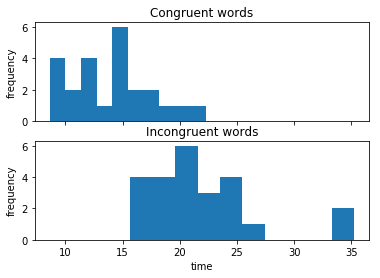

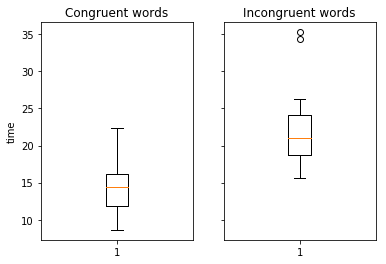

In [7]:
x = data['Congruent']
y = data['Incongruent']

# Two subplots for each condition
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
ax1.hist(x)
ax1.set_title('Congruent words')
ax1.set_ylabel('frequency') 
ax2.hist(y)
ax2.set_title('Incongruent words')
ax2.set_xlabel('time') 
ax2.set_ylabel('frequency') 

f, (ax3, ax4) = plt.subplots(1, 2, sharey=True)
ax3.boxplot(x)
ax3.set_title('Congruent words')
ax3.set_ylabel('time') 
ax4.boxplot(y)
ax4.set_title('Incongruent words')
plt.show()

The lower mean time can be clearly observed in the first histogram when compared to the histogram for Incongruent words. An identical situation is present in the 2 box plots where the Incongruent words have a higher mean. Also the Congruent dataset looks like it has a bigger spread than the Incongruent dataset (since he min and max are spread further apart from the median).

(5)  Now, perform the statistical test and report your results. What is your confidence level or Type I error associated with your test? What is your conclusion regarding the hypotheses you set up? Did the results match up with your expectations? **Hint:**  Think about what is being measured on each individual, and what statistic best captures how an individual reacts in each environment.

In [8]:
#Use ttest_ind to get statistic and p-value
stats.ttest_ind(data['Congruent'], data['Incongruent'])

Ttest_indResult(statistic=-6.5322505539032285, pvalue=4.5949489622951854e-08)

In [9]:
#Calculate difference between two tables
ttest = data.copy()
Mean_diff = -7.96
N = 24
df = 23

print (ttest)

    Congruent  Incongruent    diff
0      12.079       19.278   7.199
1      16.791       18.741   1.950
2       9.564       21.214  11.650
3       8.630       15.687   7.057
4      14.669       22.803   8.134
5      12.238       20.878   8.640
6      14.692       24.572   9.880
7       8.987       17.394   8.407
8       9.401       20.762  11.361
9      14.480       26.282  11.802
10     22.328       24.524   2.196
11     15.298       18.644   3.346
12     15.073       17.510   2.437
13     16.929       20.330   3.401
14     18.200       35.255  17.055
15     12.130       22.158  10.028
16     18.495       25.139   6.644
17     10.639       20.429   9.790
18     11.344       17.425   6.081
19     12.369       34.288  21.919
20     12.944       23.894  10.950
21     14.233       17.960   3.727
22     19.710       22.058   2.348
23     16.004       21.157   5.153


In [10]:
ttest['diff'].describe()

count    24.000000
mean      7.964792
std       4.864827
min       1.950000
25%       3.645500
50%       7.666500
75%      10.258500
max      21.919000
Name: diff, dtype: float64

In [11]:
#Calculate mean difference and standard deviation of the difference
mean_ttest = ttest['diff'].mean()
print ("mean difference:", mean_ttest)
std_ttest = ttest['diff'].std()
print ("std of the differences: ", std_ttest)

mean difference: 7.96479166667
std of the differences:  4.86482691036


In [12]:
#Get t-statistic from the std of the differences
std_diff = ttest['diff'].std()/(sqrt(N))
t_statistic = ttest['diff'].mean()/std_diff
print ("t-statistic: ", t_statistic)

t-statistic:  8.02070694411


In [13]:
#Calculate the confidence range
interval_1 = ttest['diff'].mean() - (2.069*(ttest['diff'].std()/sqrt(N)))
interval_2 = ttest['diff'].mean() + (2.069*(ttest['diff'].std()/sqrt(N)))
                      
print ("Confidence Interval: ({},{})".format(interval_1,interval_2))

Confidence Interval: (5.910215421310279,10.019367912023053)


Since the t-statistic value falls within the t-critical region the null hypothesis is rejected. Result is also significant with the p(4.5e-8)<0.05 and therefore results meet our initial expectations.

(6) Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

The effects observed relate to two theories: Speed of Processing Theory and Selective Attention Theory (https://faculty.washington.edu/chudler/words.html). Both theories wrap up what was observed earlier where people take longer to process and naming colours than words. This test could be tested with very young children who don't know how to read yet. This should have a reverse effect from the above conclusions.

A similar experiment may involve audio and images. This can be tested by displaying generic shapes and calling the shape type while the audience has to select the shape being called.